___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 3<br><br>Regression with ANN (Dummy Version for Month)<br><br>KC House Data<br><h1>

# Keras Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [47]:
#!pip install folium 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/kc_house_data.csv")

In [ ]:
#from matplotlib import style
#style.use('dark_background')

In [2]:
df = pd.read_csv("kc_house_data.csv")

## Exploratory Data Analysis and Visualization

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [6]:
df = df.drop('id', axis = 1)

### price

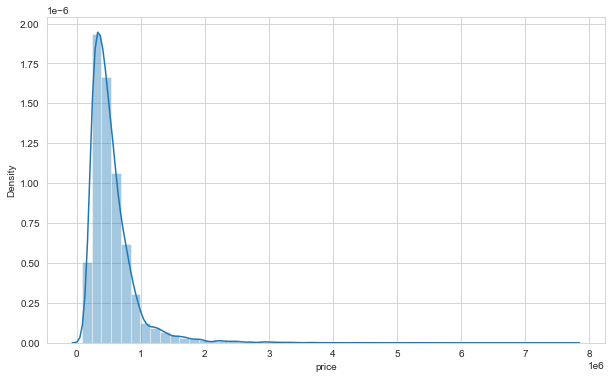

In [7]:
sns.distplot(df['price']);

In [8]:
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [9]:
df.groupby("waterfront").mean().T

waterfront,0,1
price,531762.324,1662524.184
bedrooms,3.374,3.301
bathrooms,2.112,2.678
sqft_living,2072.007,3173.687
sqft_lot,15021.290,25371.828
floors,1.493,1.641
view,0.207,3.767
condition,3.409,3.534
grade,7.649,8.773
sqft_above,1783.392,2473.043


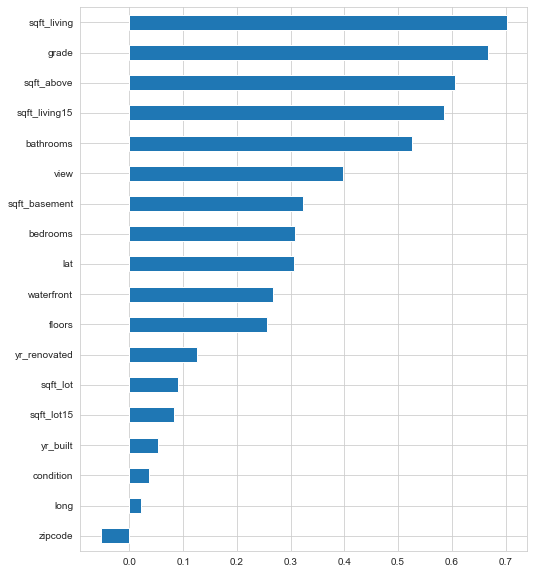

In [10]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh");

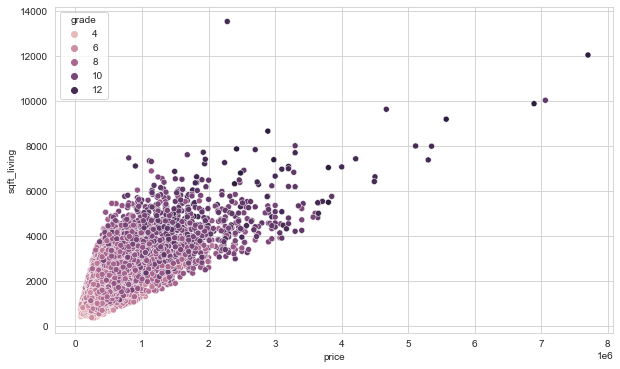

In [11]:
sns.scatterplot(x = 'price',y = 'sqft_living', data = df, hue = "grade");

### bedrooms

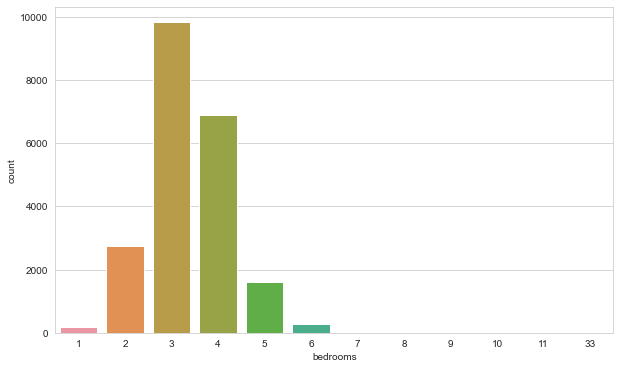

In [12]:
sns.countplot(df['bedrooms']);

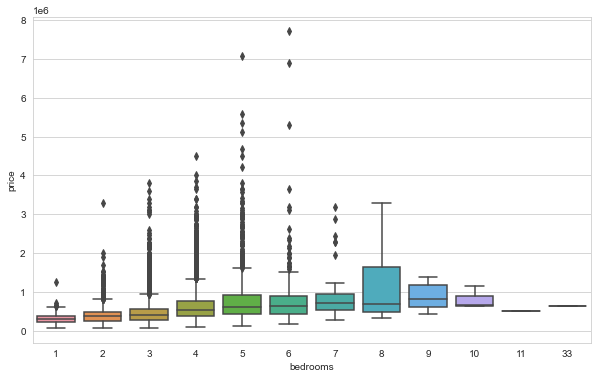

In [13]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df);

In [14]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [15]:
df = df[df["bedrooms"] != 33]

Most likely the data was entered incorrectly.

In [16]:
df.shape

(21596, 20)

### date

In [17]:
df['date'].dtype

dtype('O')

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [20]:
df['year'] = df['date'].dt.year
#df['year'] = df['date'].apply(lambda date : date.year)

In [21]:
df['month'] = df['date'].dt.month

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


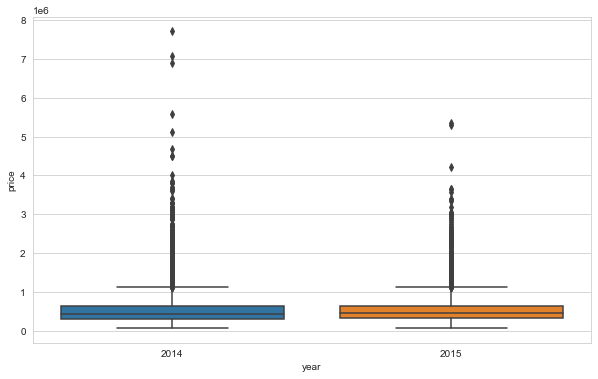

In [23]:
sns.boxplot(x = 'year', y = 'price', data = df);

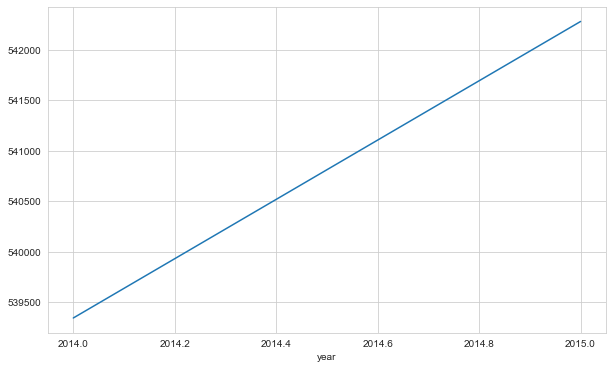

In [24]:
df.groupby('year')['price'].mean().plot();

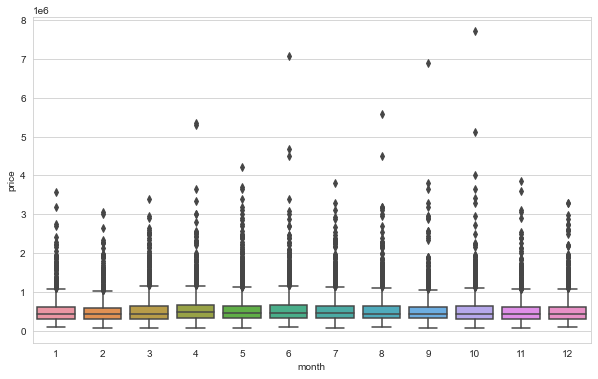

In [25]:
sns.boxplot(x = 'month', y = 'price', data = df);

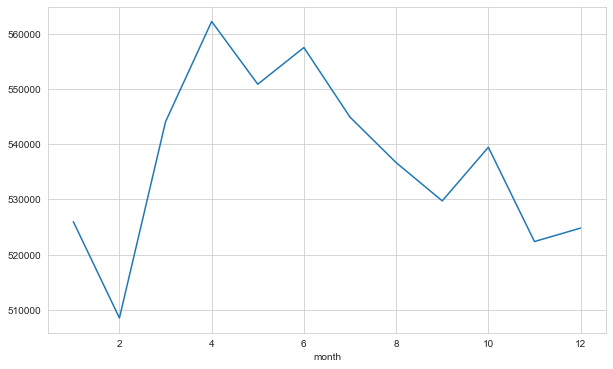

In [26]:
df.groupby('month')['price'].mean().plot();

In [27]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,0,0,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [29]:
df['zipcode'].value_counts(dropna = False)

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

we can categorize the zipcodes as north, south, west, east, middle by regions. But it can be made manually and taken many time and we need domain knowladge to do that. So we will drop this column.

In [30]:
df = df.drop('zipcode', axis = 1)

### yr_renovated & yr_built

In [31]:
df['yr_renovated'].value_counts(dropna = False)

0       20682
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
df['yr_built'].value_counts(dropna = False)

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

could make sense due to scaling, higher should correlate to more value

In [36]:
# df["yr_renovated"].replace(0, np.nan, inplace = True)
# df["yr_renovated"].fillna(df["yr_built"], inplace = True)
# df.drop("yr_built", axis = 1, inplace = True)

In [ ]:
# df["yr_renovated"].replace(0, np.nan, inplace = True)
# df["yr_renovated"].fillna(df["yr_built"], inplace = True)
# df["new_age"] = 2021 - df["yr_renovated"]
# df.drop(["yr_renovated", "yr_built"], axis = 1, inplace = True)

### sqft_basement

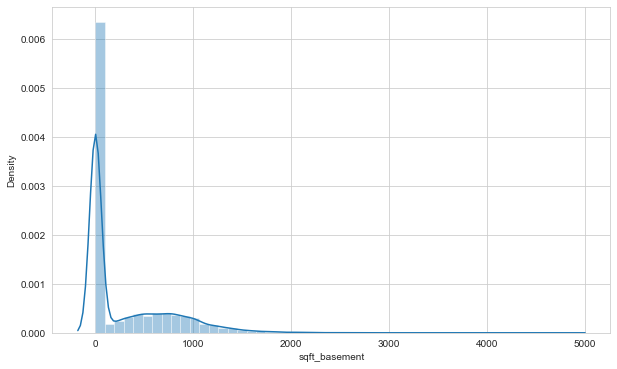

In [33]:
sns.distplot(df['sqft_basement']);

In [34]:
df['sqft_basement'].value_counts(dropna = False)

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [35]:
df[df["sqft_basement"] > 3000].sort_values(by="sqft_basement", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
8085,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,47.557,-122.210,3270,10454,0,0,0,0,0,1,0,0,0,0,0,0
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,1999,0,47.667,-121.986,4850,217800,0,0,0,0,1,0,0,0,0,0,0,0
15468,3200000.000,4,3.250,7000,28206,1.000,1,4,4,12,3500,3500,1991,0,47.593,-122.086,4913,14663,0,0,0,0,0,0,0,1,0,0,0,0
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
10074,1900000.000,5,4.250,6510,16471,2.000,0,3,4,11,3250,3260,1980,0,47.576,-122.242,4480,16471,0,0,0,0,0,0,0,0,1,0,0,0


could make sense due to scaling, higher should correlate to more value

### sqft_above

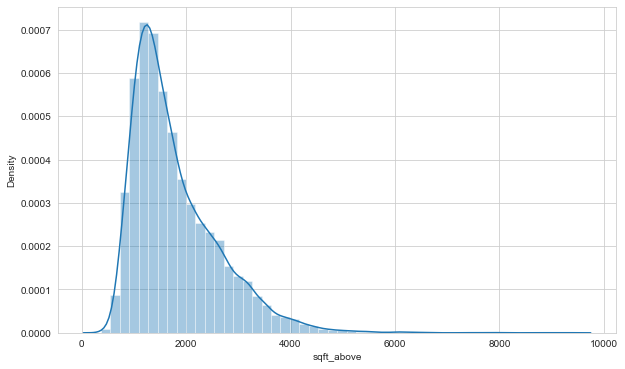

In [36]:
sns.distplot(df['sqft_above']);

In [37]:
df['sqft_above'].value_counts(dropna = False)

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [38]:
df[df["sqft_above"] > 6000].sort_values(by="sqft_above", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,1999,0,47.667,-121.986,4850,217800,0,0,0,0,1,0,0,0,0,0,0,0
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,47.630,-122.240,4540,42730,0,0,0,0,0,0,0,0,1,0,0,0
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
18288,3300000.000,5,6.250,8020,21738,2.000,0,0,3,11,8020,0,2001,0,47.568,-122.189,4160,18969,0,0,0,0,0,0,1,0,0,0,0,0
13398,2420000.000,5,4.750,7880,24250,2.000,0,2,3,13,7880,0,1996,0,47.733,-122.362,2740,10761,1,0,0,0,0,0,0,0,0,0,0,0
19842,2700000.000,4,4.000,7850,89651,2.000,0,0,3,12,7850,0,2006,0,47.541,-121.982,6210,95832,1,0,0,0,0,0,0,0,0,0,0,0
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,47.650,-122.214,3930,25449,0,0,0,0,0,1,0,0,0,0,0,0
11859,1950000.000,4,3.250,7420,167869,2.000,0,3,3,12,7420,0,2002,0,47.455,-121.764,5610,169549,1,0,0,0,0,0,0,0,0,0,0,0
18579,1140000.000,5,4.000,7320,217800,2.000,0,0,3,11,7320,0,1992,0,47.447,-122.086,3270,34500,0,0,0,0,0,0,1,0,0,0,0,0
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,47.623,-122.220,4600,21750,0,0,0,1,0,0,0,0,0,0,0,0


### Geographical Properties

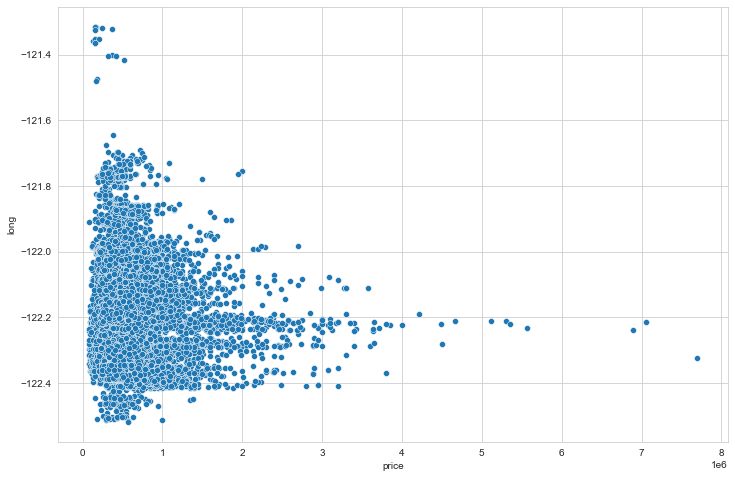

In [39]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'price', y = 'long', data = df);

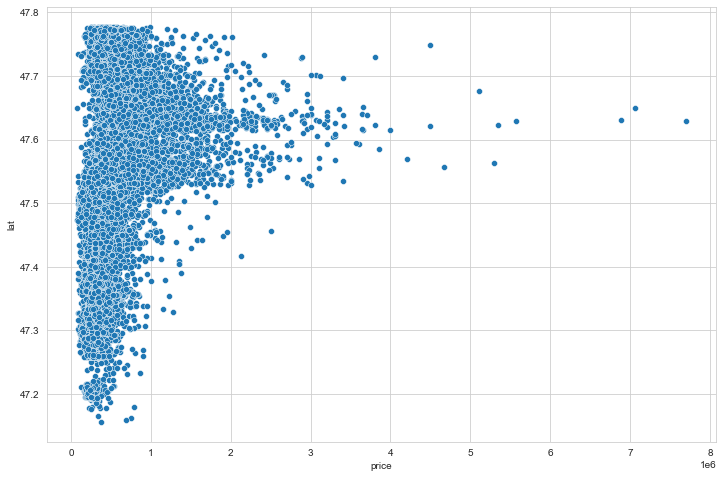

In [40]:
plt.figure(figsize  = (12, 8))
sns.scatterplot(x = 'price', y = 'lat', data = df);

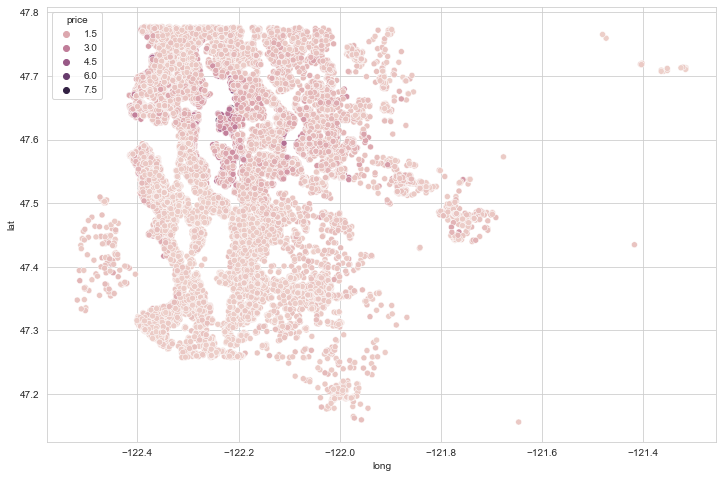

In [41]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price');

In [42]:
len(df) * (0.01)

215.96

In [43]:
df.sort_values('price', ascending = False).head(216)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,47.650,-122.214,3930,25449,0,0,0,0,0,1,0,0,0,0,0,0
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,47.630,-122.240,4540,42730,0,0,0,0,0,0,0,0,1,0,0,0
4407,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,47.629,-122.233,3560,24345,0,0,0,0,0,0,0,1,0,0,0,0
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,47.623,-122.220,4600,21750,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,1980000.000,6,4.500,4800,9097,2.000,0,0,3,10,3580,1220,2007,0,47.626,-122.291,2180,6037,0,0,0,0,0,0,1,0,0,0,0,0
16511,1980000.000,4,3.500,4500,44384,1.000,0,0,3,12,3340,1160,1990,0,47.632,-122.192,2540,26287,0,1,0,0,0,0,0,0,0,0,0,0
19513,1980000.000,4,4.000,4360,12081,2.000,0,0,3,10,4360,0,2007,0,47.638,-122.219,2180,10800,0,0,0,0,0,0,0,1,0,0,0,0
3278,1970000.000,5,3.750,3940,13738,1.500,0,3,4,9,3940,0,1951,0,47.620,-122.212,2370,13320,0,1,0,0,0,0,0,0,0,0,0,0


In [44]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

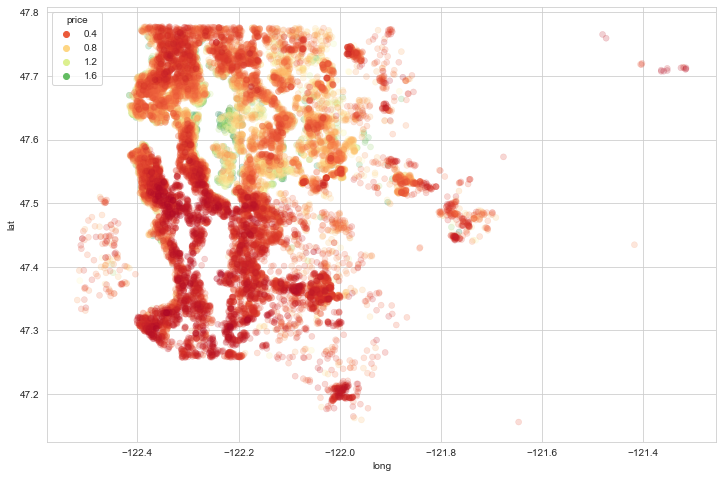

In [45]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price',
                palette = 'RdYlGn', edgecolor = None, alpha = 0.2);

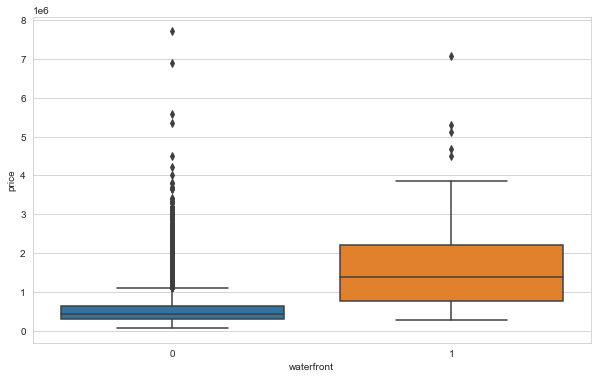

In [62]:
sns.boxplot(x = 'waterfront', y = 'price', data = df);

In [139]:
df["lat"].mean()

47.56008708094088

In [138]:
import folium
folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

TemplateNotFound: tiles/mapboxcontrolroom/tiles.txt

In [66]:
map_kc = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10) # location=[47.511,  -122.257]
for lat, lng, prc in zip(df['lat'], df['long'], df['price']):
     if prc > df['price'].mean():
       color = 'red'
     else : 
       color = 'blue'
     folium.CircleMarker(
        [lat, lng],
        radius = 1,
        color = color,
        fill = False ,
        fill_color = '#3186CC',
        fill_opacity = 0.3).add_to(map_kc)
map_kc

TemplateNotFound: tiles/mapboxcontrolroom/tiles.txt

In [60]:
map_kc = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10) # location=[47.511,  -122.257]
for lat, lng in zip(df['lat'], df['long']):
    folium.CircleMarker(
        [lat, lng],
        radius = 1,
        color = 'blue',
        fill = False ,
        fill_color ='#3186CC',
        fill_opacity = 0.3).add_to(map_kc)
map_kc

TemplateNotFound: tiles/mapboxcontrolroom/tiles.txt

### latest data

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
df.shape

(21596, 30)

## Preprocessing of Data
- Train | Test Split, Scalling

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('price', axis = 1)
y = df['price']

In [71]:
seed = 101

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [73]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [79]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [80]:
X_train.shape

(19436, 29)

In [81]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [82]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(29, 29) dtype=float32, numpy=
 array([[-1.70324743e-02, -1.51578441e-01, -3.13210070e-01,
         -1.69344082e-01, -2.32419372e-03,  1.83119476e-01,
          3.12089741e-01,  1.32420003e-01, -7.77235925e-02,
         -1.80055380e-01,  1.37490690e-01,  2.44639575e-01,
          2.31555283e-01, -6.62986040e-02, -2.74564326e-02,
         -1.35668695e-01,  2.61596382e-01,  8.22164118e-02,
          5.58787882e-02, -2.51106918e-01, -5.92915118e-02,
          2.22223699e-01,  2.98478782e-01, -2.02705756e-01,
         -7.43545145e-02,  4.26854789e-02,  1.53914899e-01,
          2.50992417e-01, -3.05378854e-01],
        [ 6.67949915e-02,  2.71055698e-01,  3.84545326e-02,
          9.87240672e-02,  4.28160727e-02,  3.17192078e-01,
          1.78963125e-01, -2.03873098e-01,  2.77073383e-02,
         -3.17017347e-01,  1.53067470e-01, -2.94106930e-01,
         -8.02034587e-02, -8.54518265e-02,  2.60613561e-01,
          8.22514594e-02,  3.08114409e-01, -1.64

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
130/130 [==============================] - 1s 5ms/step - loss: 428612583424.0000 - val_loss: 423995375616.0000
Epoch 2/1000
130/130 [==============================] - 0s 2ms/step - loss: 428064899072.0000 - val_loss: 422000689152.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 419530276864.0000 - val_loss: 402201968640.0000
Epoch 4/1000
130/130 [==============================] - 0s 2ms/step - loss: 374767910912.0000 - val_loss: 326337691648.0000
Epoch 5/1000
130/130 [==============================] - 0s 2ms/step - loss: 262120374272.0000 - val_loss: 190364057600.0000
Epoch 6/1000
130/130 [==============================] - 0s 2ms/step - loss: 139063623680.0000 - val_loss: 111865782272.0000
Epoch 7/1000
130/130 [==============================] - 0s 2ms/step - loss: 100212514816.0000 - val_loss: 104871731200.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 97036533760.0000 - val_loss: 103696465920.0000
Epoch 9/1

130/130 [==============================] - 0s 2ms/step - loss: 40185737216.0000 - val_loss: 45813686272.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 39932747776.0000 - val_loss: 45536460800.0000
Epoch 69/1000
130/130 [==============================] - 0s 2ms/step - loss: 39732604928.0000 - val_loss: 45288857600.0000
Epoch 70/1000
130/130 [==============================] - 0s 3ms/step - loss: 39518203904.0000 - val_loss: 45076680704.0000
Epoch 71/1000
130/130 [==============================] - 0s 2ms/step - loss: 39345229824.0000 - val_loss: 44906205184.0000
Epoch 72/1000
130/130 [==============================] - 0s 2ms/step - loss: 39121862656.0000 - val_loss: 44549378048.0000
Epoch 73/1000
130/130 [==============================] - 0s 2ms/step - loss: 38930071552.0000 - val_loss: 44363923456.0000
Epoch 74/1000
130/130 [==============================] - 0s 3ms/step - loss: 38759600128.0000 - val_loss: 44158582784.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 2ms/step - loss: 32852344832.0000 - val_loss: 36761468928.0000
Epoch 134/1000
130/130 [==============================] - 0s 2ms/step - loss: 32865890304.0000 - val_loss: 36604497920.0000
Epoch 135/1000
130/130 [==============================] - 0s 2ms/step - loss: 32771973120.0000 - val_loss: 36539899904.0000
Epoch 136/1000
130/130 [==============================] - 0s 2ms/step - loss: 32720353280.0000 - val_loss: 36411232256.0000
Epoch 137/1000
130/130 [==============================] - 0s 3ms/step - loss: 32705558528.0000 - val_loss: 36410789888.0000
Epoch 138/1000
130/130 [==============================] - 0s 3ms/step - loss: 32656584704.0000 - val_loss: 36443635712.0000
Epoch 139/1000
130/130 [==============================] - 0s 4ms/step - loss: 32635140096.0000 - val_loss: 36283736064.0000
Epoch 140/1000
130/130 [==============================] - 0s 2ms/step - loss: 32584962048.0000 - val_loss: 36215984128.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 31221002240.0000 - val_loss: 34274979840.0000
Epoch 200/1000
130/130 [==============================] - 0s 2ms/step - loss: 31182157824.0000 - val_loss: 34187972608.0000
Epoch 201/1000
130/130 [==============================] - 0s 2ms/step - loss: 31194482688.0000 - val_loss: 34277785600.0000
Epoch 202/1000
130/130 [==============================] - 0s 2ms/step - loss: 31148533760.0000 - val_loss: 34233032704.0000
Epoch 203/1000
130/130 [==============================] - 0s 2ms/step - loss: 31114373120.0000 - val_loss: 34109777920.0000
Epoch 204/1000
130/130 [==============================] - 0s 2ms/step - loss: 31101714432.0000 - val_loss: 34226857984.0000
Epoch 205/1000
130/130 [==============================] - 0s 2ms/step - loss: 31103535104.0000 - val_loss: 34251907072.0000
Epoch 206/1000
130/130 [==============================] - 0s 2ms/step - loss: 31080603648.0000 - val_loss: 34193514496.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 1s 9ms/step - loss: 30302316544.0000 - val_loss: 33013432320.0000
Epoch 266/1000
130/130 [==============================] - 1s 7ms/step - loss: 30286282752.0000 - val_loss: 33003747328.0000
Epoch 267/1000
130/130 [==============================] - 1s 6ms/step - loss: 30298599424.0000 - val_loss: 33052688384.0000
Epoch 268/1000
130/130 [==============================] - 1s 5ms/step - loss: 30285512704.0000 - val_loss: 32861937664.0000
Epoch 269/1000
130/130 [==============================] - 1s 6ms/step - loss: 30258311168.0000 - val_loss: 33185345536.0000
Epoch 270/1000
130/130 [==============================] - 1s 5ms/step - loss: 30280427520.0000 - val_loss: 33040986112.0000
Epoch 271/1000
130/130 [==============================] - 1s 6ms/step - loss: 30231031808.0000 - val_loss: 32886870016.0000
Epoch 272/1000
130/130 [==============================] - 1s 4ms/step - loss: 30230855680.0000 - val_loss: 33055649792.0000
Epoch 273/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 29645817856.0000 - val_loss: 32422746112.0000
Epoch 332/1000
130/130 [==============================] - 0s 2ms/step - loss: 29645080576.0000 - val_loss: 32216291328.0000
Epoch 333/1000
130/130 [==============================] - 0s 2ms/step - loss: 29639518208.0000 - val_loss: 32283621376.0000
Epoch 334/1000
130/130 [==============================] - 0s 2ms/step - loss: 29635715072.0000 - val_loss: 32191608832.0000
Epoch 335/1000
130/130 [==============================] - 0s 2ms/step - loss: 29626144768.0000 - val_loss: 32289046528.0000
Epoch 336/1000
130/130 [==============================] - 0s 4ms/step - loss: 29604321280.0000 - val_loss: 32062711808.0000
Epoch 337/1000
130/130 [==============================] - 1s 5ms/step - loss: 29618450432.0000 - val_loss: 32192755712.0000
Epoch 338/1000
130/130 [==============================] - 0s 3ms/step - loss: 29581322240.0000 - val_loss: 32313577472.0000
Epoch 339/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 29097541632.0000 - val_loss: 31654866944.0000
Epoch 398/1000
130/130 [==============================] - 0s 2ms/step - loss: 29107853312.0000 - val_loss: 31678128128.0000
Epoch 399/1000
130/130 [==============================] - 0s 2ms/step - loss: 29120276480.0000 - val_loss: 31766202368.0000
Epoch 400/1000
130/130 [==============================] - 0s 2ms/step - loss: 29143058432.0000 - val_loss: 31600510976.0000
Epoch 401/1000
130/130 [==============================] - 0s 3ms/step - loss: 29076744192.0000 - val_loss: 31540262912.0000
Epoch 402/1000
130/130 [==============================] - 0s 2ms/step - loss: 29079103488.0000 - val_loss: 31549392896.0000
Epoch 403/1000
130/130 [==============================] - 0s 2ms/step - loss: 29049993216.0000 - val_loss: 31986984960.0000
Epoch 404/1000
130/130 [==============================] - 1s 4ms/step - loss: 29069584384.0000 - val_loss: 31575652352.0000
Epoch 405/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 28550649856.0000 - val_loss: 31011602432.0000
Epoch 464/1000
130/130 [==============================] - 0s 2ms/step - loss: 28519761920.0000 - val_loss: 30990190592.0000
Epoch 465/1000
130/130 [==============================] - 0s 2ms/step - loss: 28500058112.0000 - val_loss: 31055065088.0000
Epoch 466/1000
130/130 [==============================] - 0s 3ms/step - loss: 28497119232.0000 - val_loss: 30841124864.0000
Epoch 467/1000
130/130 [==============================] - 0s 2ms/step - loss: 28513280000.0000 - val_loss: 31038408704.0000
Epoch 468/1000
130/130 [==============================] - 0s 2ms/step - loss: 28487821312.0000 - val_loss: 31158992896.0000
Epoch 469/1000
130/130 [==============================] - 0s 2ms/step - loss: 28490412032.0000 - val_loss: 30882967552.0000
Epoch 470/1000
130/130 [==============================] - 0s 3ms/step - loss: 28465082368.0000 - val_loss: 30995378176.0000
Epoch 471/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 27913238528.0000 - val_loss: 30418528256.0000
Epoch 530/1000
130/130 [==============================] - 0s 2ms/step - loss: 27904927744.0000 - val_loss: 30547871744.0000
Epoch 531/1000
130/130 [==============================] - 0s 2ms/step - loss: 27908093952.0000 - val_loss: 30363164672.0000
Epoch 532/1000
130/130 [==============================] - 0s 2ms/step - loss: 27887611904.0000 - val_loss: 30530375680.0000
Epoch 533/1000
130/130 [==============================] - 0s 2ms/step - loss: 27900190720.0000 - val_loss: 30476310528.0000
Epoch 534/1000
130/130 [==============================] - 0s 2ms/step - loss: 27871719424.0000 - val_loss: 30398461952.0000
Epoch 535/1000
130/130 [==============================] - 0s 2ms/step - loss: 27867547648.0000 - val_loss: 30424729600.0000
Epoch 536/1000
130/130 [==============================] - 0s 2ms/step - loss: 27876374528.0000 - val_loss: 30335807488.0000
Epoch 537/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 27283214336.0000 - val_loss: 29758265344.0000
Epoch 596/1000
130/130 [==============================] - 0s 2ms/step - loss: 27240548352.0000 - val_loss: 30179268608.0000
Epoch 597/1000
130/130 [==============================] - 0s 2ms/step - loss: 27302574080.0000 - val_loss: 30003449856.0000
Epoch 598/1000
130/130 [==============================] - 0s 2ms/step - loss: 27263983616.0000 - val_loss: 29803683840.0000
Epoch 599/1000
130/130 [==============================] - 0s 2ms/step - loss: 27224248320.0000 - val_loss: 29924149248.0000
Epoch 600/1000
130/130 [==============================] - 0s 2ms/step - loss: 27224033280.0000 - val_loss: 29805400064.0000
Epoch 601/1000
130/130 [==============================] - 0s 2ms/step - loss: 27207989248.0000 - val_loss: 29907171328.0000
Epoch 602/1000
130/130 [==============================] - 0s 2ms/step - loss: 27205152768.0000 - val_loss: 29644267520.0000
Epoch 603/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 26667737088.0000 - val_loss: 29493671936.0000
Epoch 662/1000
130/130 [==============================] - 0s 3ms/step - loss: 26675423232.0000 - val_loss: 29426171904.0000
Epoch 663/1000
130/130 [==============================] - 0s 3ms/step - loss: 26642001920.0000 - val_loss: 29267140608.0000
Epoch 664/1000
130/130 [==============================] - 0s 2ms/step - loss: 26642575360.0000 - val_loss: 29298331648.0000
Epoch 665/1000
130/130 [==============================] - 0s 3ms/step - loss: 26614865920.0000 - val_loss: 29494800384.0000
Epoch 666/1000
130/130 [==============================] - 0s 2ms/step - loss: 26656274432.0000 - val_loss: 29281120256.0000
Epoch 667/1000
130/130 [==============================] - 0s 2ms/step - loss: 26632988672.0000 - val_loss: 29188075520.0000
Epoch 668/1000
130/130 [==============================] - 0s 2ms/step - loss: 26599618560.0000 - val_loss: 29349550080.0000
Epoch 669/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 26087112704.0000 - val_loss: 28941950976.0000
Epoch 728/1000
130/130 [==============================] - 0s 2ms/step - loss: 26090127360.0000 - val_loss: 29096058880.0000
Epoch 729/1000
130/130 [==============================] - 0s 3ms/step - loss: 26091673600.0000 - val_loss: 29251452928.0000
Epoch 730/1000
130/130 [==============================] - 0s 3ms/step - loss: 26091284480.0000 - val_loss: 29028876288.0000
Epoch 731/1000
130/130 [==============================] - 0s 2ms/step - loss: 26087628800.0000 - val_loss: 28968044544.0000
Epoch 732/1000
130/130 [==============================] - 0s 2ms/step - loss: 26078369792.0000 - val_loss: 28837654528.0000
Epoch 733/1000
130/130 [==============================] - 0s 3ms/step - loss: 26069493760.0000 - val_loss: 28982081536.0000
Epoch 734/1000
130/130 [==============================] - 0s 3ms/step - loss: 26051559424.0000 - val_loss: 28830851072.0000
Epoch 735/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 25573894144.0000 - val_loss: 28748257280.0000
Epoch 794/1000
130/130 [==============================] - 0s 2ms/step - loss: 25545291776.0000 - val_loss: 28622094336.0000
Epoch 795/1000
130/130 [==============================] - 0s 2ms/step - loss: 25552420864.0000 - val_loss: 28629508096.0000
Epoch 796/1000
130/130 [==============================] - 0s 2ms/step - loss: 25564133376.0000 - val_loss: 28552587264.0000
Epoch 797/1000
130/130 [==============================] - 0s 2ms/step - loss: 25524164608.0000 - val_loss: 28768413696.0000
Epoch 798/1000
130/130 [==============================] - 0s 2ms/step - loss: 25518860288.0000 - val_loss: 28537004032.0000
Epoch 799/1000
130/130 [==============================] - 0s 2ms/step - loss: 25531265024.0000 - val_loss: 28674983936.0000
Epoch 800/1000
130/130 [==============================] - 0s 2ms/step - loss: 25498023936.0000 - val_loss: 28776239104.0000
Epoch 801/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 24774832128.0000 - val_loss: 28250200064.0000
Epoch 860/1000
130/130 [==============================] - 0s 2ms/step - loss: 24759951360.0000 - val_loss: 28361854976.0000
Epoch 861/1000
130/130 [==============================] - 0s 2ms/step - loss: 24743688192.0000 - val_loss: 28402331648.0000
Epoch 862/1000
130/130 [==============================] - 0s 3ms/step - loss: 24737462272.0000 - val_loss: 28609048576.0000
Epoch 863/1000
130/130 [==============================] - 0s 2ms/step - loss: 24768927744.0000 - val_loss: 28668506112.0000
Epoch 864/1000
130/130 [==============================] - 0s 3ms/step - loss: 24688136192.0000 - val_loss: 28206874624.0000
Epoch 865/1000
130/130 [==============================] - 0s 3ms/step - loss: 24671365120.0000 - val_loss: 28181622784.0000
Epoch 866/1000
130/130 [==============================] - 0s 3ms/step - loss: 24655054848.0000 - val_loss: 28186789888.0000
Epoch 867/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 23306100736.0000 - val_loss: 27222718464.0000
Epoch 926/1000
130/130 [==============================] - 0s 2ms/step - loss: 23268050944.0000 - val_loss: 27296382976.0000
Epoch 927/1000
130/130 [==============================] - 0s 3ms/step - loss: 23237423104.0000 - val_loss: 27338035200.0000
Epoch 928/1000
130/130 [==============================] - 0s 2ms/step - loss: 23200346112.0000 - val_loss: 27253202944.0000
Epoch 929/1000
130/130 [==============================] - 0s 2ms/step - loss: 23189348352.0000 - val_loss: 27325941760.0000
Epoch 930/1000
130/130 [==============================] - 0s 3ms/step - loss: 23155908608.0000 - val_loss: 27281145856.0000
Epoch 931/1000
130/130 [==============================] - 0s 2ms/step - loss: 23114459136.0000 - val_loss: 27084898304.0000
Epoch 932/1000
130/130 [==============================] - 0s 3ms/step - loss: 23090944000.0000 - val_loss: 27031478272.0000
Epoch 933/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 21414821888.0000 - val_loss: 25687451648.0000
Epoch 992/1000
130/130 [==============================] - 0s 2ms/step - loss: 21379035136.0000 - val_loss: 25637787648.0000
Epoch 993/1000
130/130 [==============================] - 0s 2ms/step - loss: 21429590016.0000 - val_loss: 25631490048.0000
Epoch 994/1000
130/130 [==============================] - 0s 2ms/step - loss: 21315477504.0000 - val_loss: 25777203200.0000
Epoch 995/1000
130/130 [==============================] - 0s 2ms/step - loss: 21284235264.0000 - val_loss: 25687005184.0000
Epoch 996/1000
130/130 [==============================] - 0s 3ms/step - loss: 21288222720.0000 - val_loss: 25660815360.0000
Epoch 997/1000
130/130 [==============================] - 0s 2ms/step - loss: 21245378560.0000 - val_loss: 25653690368.0000
Epoch 998/1000
130/130 [==============================] - 0s 2ms/step - loss: 21231824896.0000 - val_loss: 25607974912.0000
Epoch 999/1000
130/130 

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 29)                870       
                                                                 
 dense_2 (Dense)             (None, 15)                450       
                                                                 
 dense_3 (Dense)             (None, 8)                 128       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,327
Trainable params: 2,327
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(29, 29) dtype=float32, numpy=
 array([[-3.70519400e-01, -1.18687391e+00, -8.72709215e-01,
         -9.49077547e-01, -7.16276050e-01, -8.89410496e-01,
         -9.28321004e-01, -9.55050945e-01, -8.68582428e-01,
         -6.44142389e-01, -1.05554616e+00, -2.47005105e+00,
          1.30694121e-01, -7.59675086e-01,  1.05591941e+00,
         -7.10674286e-01, -5.02361596e-01, -6.00312591e-01,
         -1.01844013e+00, -1.52775121e+00, -7.18092859e-01,
         -3.27992409e-01, -9.89106476e-01, -8.74792814e-01,
         -5.89617252e-01,  2.09263325e-01,  5.66704035e-01,
          9.76566553e-01, -5.46249568e-01],
        [ 8.16445529e-01,  9.44459736e-01, -3.44468951e-01,
          7.07795322e-01,  5.23589313e-01,  8.39874208e-01,
          6.33651018e-01,  3.18662524e-01,  3.46450186e+00,
          4.12417233e-01,  1.14889765e+00,  1.62111735e+00,
         -1.78282976e-01,  2.08629370e+00,  1.87035456e-01,
          2.92708063e+00,  1.95406282e+00,  4.71

In [86]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428612583424.000,423995375616.000
1,428064899072.000,422000689152.000
2,419530276864.000,402201968640.000
3,374767910912.000,326337691648.000
4,262120374272.000,190364057600.000
...,...,...
995,21288222720.000,25660815360.000
996,21245378560.000,25653690368.000
997,21231824896.000,25607974912.000
998,21174736896.000,25629779968.000


<AxesSubplot:>

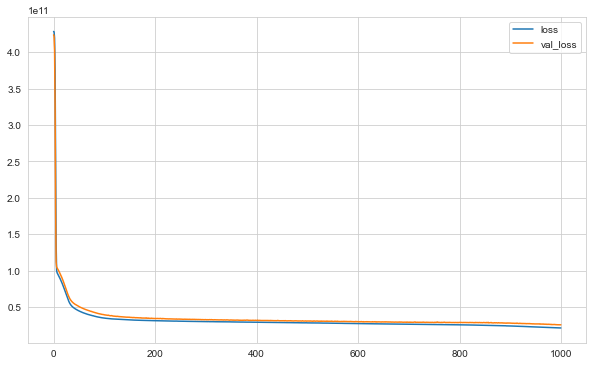

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [88]:
model.evaluate(X_test, y_test, verbose=0)

19348867072.0

In [89]:
y_pred = model.predict(X_test)

In [90]:
eval_metric(y_test, y_pred)

r2_score: 0.8494014225755431 
mae: 83400.83484519676 
mse: 19348869375.566948 
rmse: 139100.21342746727


### learning_rate

In [91]:
from tensorflow.keras.optimizers import Adam

In [92]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [93]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(29, 29) dtype=float32, numpy=
 array([[-1.70324743e-02, -1.51578441e-01, -3.13210070e-01,
         -1.69344082e-01, -2.32419372e-03,  1.83119476e-01,
          3.12089741e-01,  1.32420003e-01, -7.77235925e-02,
         -1.80055380e-01,  1.37490690e-01,  2.44639575e-01,
          2.31555283e-01, -6.62986040e-02, -2.74564326e-02,
         -1.35668695e-01,  2.61596382e-01,  8.22164118e-02,
          5.58787882e-02, -2.51106918e-01, -5.92915118e-02,
          2.22223699e-01,  2.98478782e-01, -2.02705756e-01,
         -7.43545145e-02,  4.26854789e-02,  1.53914899e-01,
          2.50992417e-01, -3.05378854e-01],
        [ 6.67949915e-02,  2.71055698e-01,  3.84545326e-02,
          9.87240672e-02,  4.28160727e-02,  3.17192078e-01,
          1.78963125e-01, -2.03873098e-01,  2.77073383e-02,
         -3.17017347e-01,  1.53067470e-01, -2.94106930e-01,
         -8.02034587e-02, -8.54518265e-02,  2.60613561e-01,
          8.22514594e-02,  3.08114409e-01, -1.

In [94]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
130/130 [==============================] - 1s 5ms/step - loss: 428062801920.0000 - val_loss: 419663216640.0000
Epoch 2/1000
130/130 [==============================] - 0s 2ms/step - loss: 348343828480.0000 - val_loss: 181425520640.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 108675301376.0000 - val_loss: 103254376448.0000
Epoch 4/1000
130/130 [==============================] - 0s 2ms/step - loss: 93860651008.0000 - val_loss: 99181690880.0000
Epoch 5/1000
130/130 [==============================] - 0s 3ms/step - loss: 89556877312.0000 - val_loss: 94929657856.0000
Epoch 6/1000
130/130 [==============================] - 0s 3ms/step - loss: 84964990976.0000 - val_loss: 90089545728.0000
Epoch 7/1000
130/130 [==============================] - 0s 3ms/step - loss: 80082558976.0000 - val_loss: 85358977024.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 74900643840.0000 - val_loss: 79852060672.0000
Epoch 9/1000
130/1

130/130 [==============================] - 0s 2ms/step - loss: 31366117376.0000 - val_loss: 34190659584.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 31204558848.0000 - val_loss: 34346010624.0000
Epoch 69/1000
130/130 [==============================] - 0s 3ms/step - loss: 31229063168.0000 - val_loss: 34205714432.0000
Epoch 70/1000
130/130 [==============================] - 0s 3ms/step - loss: 31147737088.0000 - val_loss: 33960624128.0000
Epoch 71/1000
130/130 [==============================] - 0s 2ms/step - loss: 31253858304.0000 - val_loss: 34416943104.0000
Epoch 72/1000
130/130 [==============================] - 0s 3ms/step - loss: 31045656576.0000 - val_loss: 33776326656.0000
Epoch 73/1000
130/130 [==============================] - 0s 3ms/step - loss: 31002263552.0000 - val_loss: 33801293824.0000
Epoch 74/1000
130/130 [==============================] - 0s 2ms/step - loss: 30959386624.0000 - val_loss: 33821898752.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 3ms/step - loss: 29300965376.0000 - val_loss: 31634096128.0000
Epoch 134/1000
130/130 [==============================] - 0s 3ms/step - loss: 29322926080.0000 - val_loss: 31569258496.0000
Epoch 135/1000
130/130 [==============================] - 0s 2ms/step - loss: 29228423168.0000 - val_loss: 31516225536.0000
Epoch 136/1000
130/130 [==============================] - 0s 3ms/step - loss: 29172629504.0000 - val_loss: 31383611392.0000
Epoch 137/1000
130/130 [==============================] - 0s 3ms/step - loss: 29153554432.0000 - val_loss: 31440838656.0000
Epoch 138/1000
130/130 [==============================] - 0s 2ms/step - loss: 29084874752.0000 - val_loss: 31949805568.0000
Epoch 139/1000
130/130 [==============================] - 0s 2ms/step - loss: 29158240256.0000 - val_loss: 31514806272.0000
Epoch 140/1000
130/130 [==============================] - 0s 2ms/step - loss: 29048848384.0000 - val_loss: 31523903488.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 27801012224.0000 - val_loss: 30268223488.0000
Epoch 200/1000
130/130 [==============================] - 0s 3ms/step - loss: 27740565504.0000 - val_loss: 30115031040.0000
Epoch 201/1000
130/130 [==============================] - 0s 2ms/step - loss: 27714377728.0000 - val_loss: 30801270784.0000
Epoch 202/1000
130/130 [==============================] - 0s 2ms/step - loss: 27640942592.0000 - val_loss: 30648061952.0000
Epoch 203/1000
130/130 [==============================] - 0s 2ms/step - loss: 27588706304.0000 - val_loss: 30022957056.0000
Epoch 204/1000
130/130 [==============================] - 0s 3ms/step - loss: 27556018176.0000 - val_loss: 30546391040.0000
Epoch 205/1000
130/130 [==============================] - 0s 2ms/step - loss: 27575764992.0000 - val_loss: 30169726976.0000
Epoch 206/1000
130/130 [==============================] - 0s 3ms/step - loss: 27526352896.0000 - val_loss: 30239827968.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 26090024960.0000 - val_loss: 29116368896.0000
Epoch 266/1000
130/130 [==============================] - 0s 3ms/step - loss: 26065786880.0000 - val_loss: 28958582784.0000
Epoch 267/1000
130/130 [==============================] - 0s 3ms/step - loss: 26099179520.0000 - val_loss: 28873711616.0000
Epoch 268/1000
130/130 [==============================] - 0s 3ms/step - loss: 26036842496.0000 - val_loss: 28724791296.0000
Epoch 269/1000
130/130 [==============================] - 0s 4ms/step - loss: 25977362432.0000 - val_loss: 29414918144.0000
Epoch 270/1000
130/130 [==============================] - 0s 3ms/step - loss: 26067083264.0000 - val_loss: 29036689408.0000
Epoch 271/1000
130/130 [==============================] - 0s 3ms/step - loss: 25951825920.0000 - val_loss: 28750241792.0000
Epoch 272/1000
130/130 [==============================] - 0s 3ms/step - loss: 26035238912.0000 - val_loss: 29098153984.0000
Epoch 273/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 25121714176.0000 - val_loss: 28900630528.0000
Epoch 332/1000
130/130 [==============================] - 0s 2ms/step - loss: 25080496128.0000 - val_loss: 28460328960.0000
Epoch 333/1000
130/130 [==============================] - 0s 2ms/step - loss: 25017677824.0000 - val_loss: 28743079936.0000
Epoch 334/1000
130/130 [==============================] - 0s 2ms/step - loss: 25046790144.0000 - val_loss: 28909502464.0000
Epoch 335/1000
130/130 [==============================] - 0s 2ms/step - loss: 25000654848.0000 - val_loss: 28920240128.0000
Epoch 336/1000
130/130 [==============================] - 0s 2ms/step - loss: 24989403136.0000 - val_loss: 28303007744.0000
Epoch 337/1000
130/130 [==============================] - 0s 2ms/step - loss: 25017366528.0000 - val_loss: 28702953472.0000
Epoch 338/1000
130/130 [==============================] - 0s 2ms/step - loss: 24967118848.0000 - val_loss: 28671221760.0000
Epoch 339/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 24362813440.0000 - val_loss: 29776707584.0000
Epoch 398/1000
130/130 [==============================] - 0s 3ms/step - loss: 24400599040.0000 - val_loss: 29094559744.0000
Epoch 399/1000
130/130 [==============================] - 0s 2ms/step - loss: 24375527424.0000 - val_loss: 30149292032.0000
Epoch 400/1000
130/130 [==============================] - 0s 2ms/step - loss: 24474306560.0000 - val_loss: 29195204608.0000
Epoch 401/1000
130/130 [==============================] - 0s 2ms/step - loss: 24394049536.0000 - val_loss: 29005318144.0000
Epoch 402/1000
130/130 [==============================] - 0s 3ms/step - loss: 24376219648.0000 - val_loss: 29134546944.0000
Epoch 403/1000
130/130 [==============================] - 0s 2ms/step - loss: 24295712768.0000 - val_loss: 29779929088.0000
Epoch 404/1000
130/130 [==============================] - 0s 2ms/step - loss: 24384778240.0000 - val_loss: 28964177920.0000
Epoch 405/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 23942615040.0000 - val_loss: 29444005888.0000
Epoch 464/1000
130/130 [==============================] - 0s 3ms/step - loss: 23863019520.0000 - val_loss: 29642170368.0000
Epoch 465/1000
130/130 [==============================] - 0s 2ms/step - loss: 23856502784.0000 - val_loss: 29832122368.0000
Epoch 466/1000
130/130 [==============================] - 0s 2ms/step - loss: 23918565376.0000 - val_loss: 29569816576.0000
Epoch 467/1000
130/130 [==============================] - 0s 2ms/step - loss: 23903541248.0000 - val_loss: 29590386688.0000
Epoch 468/1000
130/130 [==============================] - 0s 2ms/step - loss: 23843182592.0000 - val_loss: 29818544128.0000
Epoch 469/1000
130/130 [==============================] - 0s 2ms/step - loss: 23913361408.0000 - val_loss: 29646131200.0000
Epoch 470/1000
130/130 [==============================] - 0s 2ms/step - loss: 23847849984.0000 - val_loss: 29709611008.0000
Epoch 471/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 23461021696.0000 - val_loss: 30121535488.0000
Epoch 530/1000
130/130 [==============================] - 0s 2ms/step - loss: 23442231296.0000 - val_loss: 30325999616.0000
Epoch 531/1000
130/130 [==============================] - 0s 2ms/step - loss: 23419004928.0000 - val_loss: 30048919552.0000
Epoch 532/1000
130/130 [==============================] - 0s 2ms/step - loss: 23399876608.0000 - val_loss: 30349146112.0000
Epoch 533/1000
130/130 [==============================] - 0s 2ms/step - loss: 23432345600.0000 - val_loss: 29896386560.0000
Epoch 534/1000
130/130 [==============================] - 0s 2ms/step - loss: 23400765440.0000 - val_loss: 30080651264.0000
Epoch 535/1000
130/130 [==============================] - 0s 2ms/step - loss: 23419615232.0000 - val_loss: 30129469440.0000
Epoch 536/1000
130/130 [==============================] - 0s 2ms/step - loss: 23451154432.0000 - val_loss: 29953417216.0000
Epoch 537/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 23079946240.0000 - val_loss: 30188480512.0000
Epoch 596/1000
130/130 [==============================] - 0s 2ms/step - loss: 23018649600.0000 - val_loss: 31664007168.0000
Epoch 597/1000
130/130 [==============================] - 0s 2ms/step - loss: 23128481792.0000 - val_loss: 30876268544.0000
Epoch 598/1000
130/130 [==============================] - 0s 2ms/step - loss: 23141468160.0000 - val_loss: 30566983680.0000
Epoch 599/1000
130/130 [==============================] - 0s 2ms/step - loss: 23022071808.0000 - val_loss: 30658707456.0000
Epoch 600/1000
130/130 [==============================] - 0s 2ms/step - loss: 23006038016.0000 - val_loss: 30415654912.0000
Epoch 601/1000
130/130 [==============================] - 0s 2ms/step - loss: 23043430400.0000 - val_loss: 30340648960.0000
Epoch 602/1000
130/130 [==============================] - 0s 2ms/step - loss: 23025870848.0000 - val_loss: 30496229376.0000
Epoch 603/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 22611204096.0000 - val_loss: 30907961344.0000
Epoch 662/1000
130/130 [==============================] - 0s 3ms/step - loss: 22661410816.0000 - val_loss: 30509998080.0000
Epoch 663/1000
130/130 [==============================] - 0s 3ms/step - loss: 22551345152.0000 - val_loss: 30527823872.0000
Epoch 664/1000
130/130 [==============================] - 0s 3ms/step - loss: 22525792256.0000 - val_loss: 30442463232.0000
Epoch 665/1000
130/130 [==============================] - 0s 2ms/step - loss: 22591893504.0000 - val_loss: 30882885632.0000
Epoch 666/1000
130/130 [==============================] - 0s 2ms/step - loss: 22601041920.0000 - val_loss: 30593681408.0000
Epoch 667/1000
130/130 [==============================] - 0s 2ms/step - loss: 22553466880.0000 - val_loss: 30505857024.0000
Epoch 668/1000
130/130 [==============================] - 0s 2ms/step - loss: 22513207296.0000 - val_loss: 30485245952.0000
Epoch 669/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 19403446272.0000 - val_loss: 27033055232.0000
Epoch 728/1000
130/130 [==============================] - 0s 2ms/step - loss: 19392837632.0000 - val_loss: 27339558912.0000
Epoch 729/1000
130/130 [==============================] - 0s 2ms/step - loss: 19257131008.0000 - val_loss: 27839528960.0000
Epoch 730/1000
130/130 [==============================] - 0s 2ms/step - loss: 19212711936.0000 - val_loss: 27423676416.0000
Epoch 731/1000
130/130 [==============================] - 0s 2ms/step - loss: 19257874432.0000 - val_loss: 26898796544.0000
Epoch 732/1000
130/130 [==============================] - 0s 2ms/step - loss: 19121133568.0000 - val_loss: 26431059968.0000
Epoch 733/1000
130/130 [==============================] - 0s 2ms/step - loss: 19003219968.0000 - val_loss: 26492569600.0000
Epoch 734/1000
130/130 [==============================] - 0s 2ms/step - loss: 18961922048.0000 - val_loss: 26466547712.0000
Epoch 735/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 16473446400.0000 - val_loss: 23858477056.0000
Epoch 794/1000
130/130 [==============================] - 0s 2ms/step - loss: 16396687360.0000 - val_loss: 23406413824.0000
Epoch 795/1000
130/130 [==============================] - 0s 2ms/step - loss: 16392814592.0000 - val_loss: 23583690752.0000
Epoch 796/1000
130/130 [==============================] - 0s 2ms/step - loss: 16345298944.0000 - val_loss: 23629447168.0000
Epoch 797/1000
130/130 [==============================] - 0s 2ms/step - loss: 16354470912.0000 - val_loss: 23597391872.0000
Epoch 798/1000
130/130 [==============================] - 0s 2ms/step - loss: 16388780032.0000 - val_loss: 23696351232.0000
Epoch 799/1000
130/130 [==============================] - 0s 2ms/step - loss: 16334822400.0000 - val_loss: 23517751296.0000
Epoch 800/1000
130/130 [==============================] - 0s 2ms/step - loss: 16298675200.0000 - val_loss: 23461271552.0000
Epoch 801/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 15347134464.0000 - val_loss: 22709581824.0000
Epoch 860/1000
130/130 [==============================] - 0s 2ms/step - loss: 15402807296.0000 - val_loss: 22733979648.0000
Epoch 861/1000
130/130 [==============================] - 0s 2ms/step - loss: 15316603904.0000 - val_loss: 22794864640.0000
Epoch 862/1000
130/130 [==============================] - 0s 3ms/step - loss: 15325202432.0000 - val_loss: 23529162752.0000
Epoch 863/1000
130/130 [==============================] - 0s 3ms/step - loss: 15464761344.0000 - val_loss: 23319691264.0000
Epoch 864/1000
130/130 [==============================] - 0s 3ms/step - loss: 15293255680.0000 - val_loss: 22705659904.0000
Epoch 865/1000
130/130 [==============================] - 0s 3ms/step - loss: 15287620608.0000 - val_loss: 22794067968.0000
Epoch 866/1000
130/130 [==============================] - 0s 3ms/step - loss: 15205967872.0000 - val_loss: 22875195392.0000
Epoch 867/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 14542802944.0000 - val_loss: 22596864000.0000
Epoch 926/1000
130/130 [==============================] - 0s 3ms/step - loss: 14618555392.0000 - val_loss: 22797547520.0000
Epoch 927/1000
130/130 [==============================] - 0s 3ms/step - loss: 14595964928.0000 - val_loss: 23027818496.0000
Epoch 928/1000
130/130 [==============================] - 0s 2ms/step - loss: 14515228672.0000 - val_loss: 23169384448.0000
Epoch 929/1000
130/130 [==============================] - 0s 2ms/step - loss: 14548656128.0000 - val_loss: 22756732928.0000
Epoch 930/1000
130/130 [==============================] - 0s 2ms/step - loss: 14560018432.0000 - val_loss: 22938734592.0000
Epoch 931/1000
130/130 [==============================] - 0s 2ms/step - loss: 14485176320.0000 - val_loss: 22712895488.0000
Epoch 932/1000
130/130 [==============================] - 0s 2ms/step - loss: 14504791040.0000 - val_loss: 22815528960.0000
Epoch 933/1000
130/130 

130/130 [==============================] - 0s 2ms/step - loss: 13820498944.0000 - val_loss: 22359711744.0000
Epoch 992/1000
130/130 [==============================] - 0s 2ms/step - loss: 13788911616.0000 - val_loss: 22324099072.0000
Epoch 993/1000
130/130 [==============================] - 0s 2ms/step - loss: 13945088000.0000 - val_loss: 22417760256.0000
Epoch 994/1000
130/130 [==============================] - 0s 2ms/step - loss: 13695294464.0000 - val_loss: 22504738816.0000
Epoch 995/1000
130/130 [==============================] - 0s 2ms/step - loss: 13717033984.0000 - val_loss: 22361579520.0000
Epoch 996/1000
130/130 [==============================] - 0s 2ms/step - loss: 13728531456.0000 - val_loss: 22189496320.0000
Epoch 997/1000
130/130 [==============================] - 0s 2ms/step - loss: 13628196864.0000 - val_loss: 22354124800.0000
Epoch 998/1000
130/130 [==============================] - 0s 2ms/step - loss: 13705737216.0000 - val_loss: 22461089792.0000
Epoch 999/1000
130/130 

<AxesSubplot:>

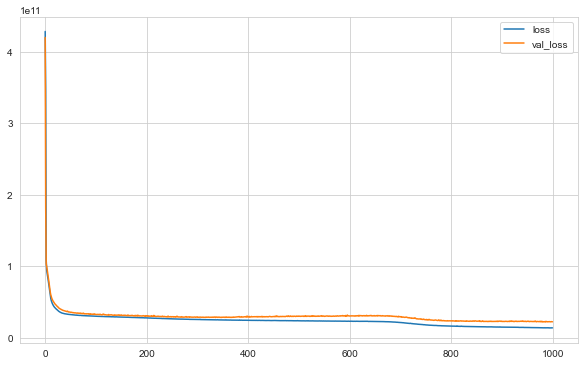

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
y_pred = model.predict(X_test)

In [97]:
eval_metric(y_test, y_pred)

r2_score: 0.8706953761696157 
mae: 76384.08531901041 
mse: 16613027287.09988 
rmse: 128891.53303107183


### EarlyStopping

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 1s 2ms/step - loss: 428062801920.0000 - val_loss: 419663216640.0000
Epoch 2/1000
130/130 [==============================] - 0s 2ms/step - loss: 348343828480.0000 - val_loss: 181425520640.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 108675301376.0000 - val_loss: 103254376448.0000
Epoch 4/1000
130/130 [==============================] - 0s 2ms/step - loss: 93860651008.0000 - val_loss: 99181690880.0000
Epoch 5/1000
130/130 [==============================] - 0s 2ms/step - loss: 89556877312.0000 - val_loss: 94929657856.0000
Epoch 6/1000
130/130 [==============================] - 0s 2ms/step - loss: 84964990976.0000 - val_loss: 90089545728.0000
Epoch 7/1000
130/130 [==============================] - 0s 2ms/step - loss: 80082558976.0000 - val_loss: 85358977024.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 74900643840.0000 - val_loss: 79852060672.0000
Epoch 9/1000
130/1

130/130 [==============================] - 0s 2ms/step - loss: 31366117376.0000 - val_loss: 34190659584.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 31204558848.0000 - val_loss: 34346010624.0000
Epoch 69/1000
130/130 [==============================] - 0s 2ms/step - loss: 31229063168.0000 - val_loss: 34205714432.0000
Epoch 70/1000
130/130 [==============================] - 0s 2ms/step - loss: 31147737088.0000 - val_loss: 33960624128.0000
Epoch 71/1000
130/130 [==============================] - 0s 2ms/step - loss: 31253858304.0000 - val_loss: 34416943104.0000
Epoch 72/1000
130/130 [==============================] - 0s 2ms/step - loss: 31045656576.0000 - val_loss: 33776326656.0000
Epoch 73/1000
130/130 [==============================] - 0s 2ms/step - loss: 31002263552.0000 - val_loss: 33801293824.0000
Epoch 74/1000
130/130 [==============================] - 0s 2ms/step - loss: 30959386624.0000 - val_loss: 33821898752.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 3ms/step - loss: 29300965376.0000 - val_loss: 31634096128.0000
Epoch 134/1000
130/130 [==============================] - 0s 2ms/step - loss: 29322926080.0000 - val_loss: 31569258496.0000
Epoch 135/1000
130/130 [==============================] - 0s 3ms/step - loss: 29228423168.0000 - val_loss: 31516225536.0000
Epoch 136/1000
130/130 [==============================] - 0s 3ms/step - loss: 29172629504.0000 - val_loss: 31383611392.0000
Epoch 137/1000
130/130 [==============================] - 0s 3ms/step - loss: 29153554432.0000 - val_loss: 31440838656.0000
Epoch 138/1000
130/130 [==============================] - 0s 2ms/step - loss: 29084874752.0000 - val_loss: 31949805568.0000
Epoch 139/1000
130/130 [==============================] - 0s 2ms/step - loss: 29158240256.0000 - val_loss: 31514806272.0000
Epoch 140/1000
130/130 [==============================] - 0s 3ms/step - loss: 29048848384.0000 - val_loss: 31523903488.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 27801012224.0000 - val_loss: 30268223488.0000
Epoch 200/1000
130/130 [==============================] - 0s 3ms/step - loss: 27740565504.0000 - val_loss: 30115031040.0000
Epoch 201/1000
130/130 [==============================] - 0s 3ms/step - loss: 27714377728.0000 - val_loss: 30801270784.0000
Epoch 202/1000
130/130 [==============================] - 0s 3ms/step - loss: 27640942592.0000 - val_loss: 30648061952.0000
Epoch 203/1000
130/130 [==============================] - 0s 3ms/step - loss: 27588706304.0000 - val_loss: 30022957056.0000
Epoch 204/1000
130/130 [==============================] - 0s 3ms/step - loss: 27556018176.0000 - val_loss: 30546391040.0000
Epoch 205/1000
130/130 [==============================] - 0s 3ms/step - loss: 27575764992.0000 - val_loss: 30169726976.0000
Epoch 206/1000
130/130 [==============================] - 0s 3ms/step - loss: 27526352896.0000 - val_loss: 30239827968.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 26090024960.0000 - val_loss: 29116368896.0000
Epoch 266/1000
130/130 [==============================] - 0s 3ms/step - loss: 26065786880.0000 - val_loss: 28958582784.0000
Epoch 267/1000
130/130 [==============================] - 0s 3ms/step - loss: 26099179520.0000 - val_loss: 28873711616.0000
Epoch 268/1000
130/130 [==============================] - 0s 3ms/step - loss: 26036842496.0000 - val_loss: 28724791296.0000
Epoch 269/1000
130/130 [==============================] - 0s 3ms/step - loss: 25977362432.0000 - val_loss: 29414918144.0000
Epoch 270/1000
130/130 [==============================] - 0s 3ms/step - loss: 26067083264.0000 - val_loss: 29036689408.0000
Epoch 271/1000
130/130 [==============================] - 0s 3ms/step - loss: 25951825920.0000 - val_loss: 28750241792.0000
Epoch 272/1000
130/130 [==============================] - 0s 3ms/step - loss: 26035238912.0000 - val_loss: 29098153984.0000
Epoch 273/1000
130/130 

<AxesSubplot:>

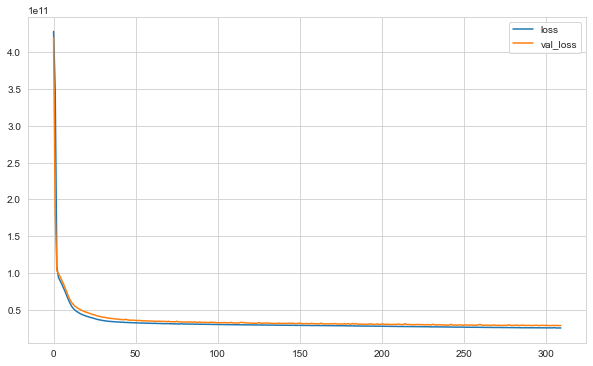

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [103]:
y_pred = model.predict(X_test)

In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.8179497074172354 
mae: 95084.46300636574 
mse: 23389778251.621227 
rmse: 152937.17092852615


### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [105]:
from tensorflow.keras.layers import Dropout

In [106]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(29, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [108]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [109]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 2s 4ms/step - loss: 427572002816.0000 - val_loss: 414624251904.0000
Epoch 2/1000
130/130 [==============================] - 0s 3ms/step - loss: 272045604864.0000 - val_loss: 106626056192.0000
Epoch 3/1000
130/130 [==============================] - 0s 2ms/step - loss: 127681044480.0000 - val_loss: 101564833792.0000
Epoch 4/1000
130/130 [==============================] - 0s 2ms/step - loss: 115980656640.0000 - val_loss: 94682439680.0000
Epoch 5/1000
130/130 [==============================] - 0s 2ms/step - loss: 111958171648.0000 - val_loss: 88348622848.0000
Epoch 6/1000
130/130 [==============================] - 0s 2ms/step - loss: 105106890752.0000 - val_loss: 82633883648.0000
Epoch 7/1000
130/130 [==============================] - 0s 3ms/step - loss: 98024972288.0000 - val_loss: 74033315840.0000
Epoch 8/1000
130/130 [==============================] - 0s 2ms/step - loss: 89550905344.0000 - val_loss: 67734417408.0000
Epoch 9/1000
13

130/130 [==============================] - 0s 2ms/step - loss: 61701791744.0000 - val_loss: 36963651584.0000
Epoch 68/1000
130/130 [==============================] - 0s 2ms/step - loss: 60822773760.0000 - val_loss: 36193939456.0000
Epoch 69/1000
130/130 [==============================] - 0s 3ms/step - loss: 61968363520.0000 - val_loss: 35607891968.0000
Epoch 70/1000
130/130 [==============================] - 0s 3ms/step - loss: 63638933504.0000 - val_loss: 35890655232.0000
Epoch 71/1000
130/130 [==============================] - 0s 3ms/step - loss: 62670032896.0000 - val_loss: 35152445440.0000
Epoch 72/1000
130/130 [==============================] - 0s 3ms/step - loss: 60197232640.0000 - val_loss: 36408389632.0000
Epoch 73/1000
130/130 [==============================] - 0s 2ms/step - loss: 61431971840.0000 - val_loss: 35616444416.0000
Epoch 74/1000
130/130 [==============================] - 0s 2ms/step - loss: 61985669120.0000 - val_loss: 36327235584.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 2ms/step - loss: 58470293504.0000 - val_loss: 33604263936.0000
Epoch 134/1000
130/130 [==============================] - 0s 2ms/step - loss: 58757156864.0000 - val_loss: 33564682240.0000
Epoch 135/1000
130/130 [==============================] - 0s 2ms/step - loss: 59121311744.0000 - val_loss: 33453811712.0000
Epoch 136/1000
130/130 [==============================] - 0s 3ms/step - loss: 62195097600.0000 - val_loss: 33983635456.0000
Epoch 137/1000
130/130 [==============================] - 0s 2ms/step - loss: 57074532352.0000 - val_loss: 33290498048.0000
Epoch 138/1000
130/130 [==============================] - 0s 2ms/step - loss: 58397925376.0000 - val_loss: 32809998336.0000
Epoch 139/1000
130/130 [==============================] - 0s 2ms/step - loss: 57368068096.0000 - val_loss: 32952647680.0000
Epoch 140/1000
130/130 [==============================] - 0s 2ms/step - loss: 59449552896.0000 - val_loss: 34597253120.0000
Epoch 141/1000
130/130 

<AxesSubplot:>

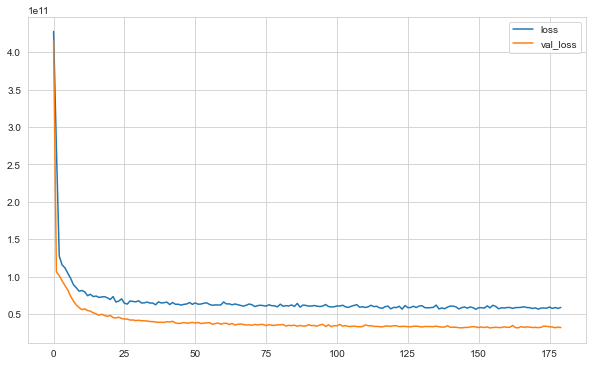

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [111]:
y_pred = model.predict(X_test)

In [112]:
eval_metric(y_test, y_pred)

r2_score: 0.7904568007972697 
mae: 101823.81887297453 
mse: 26922060349.114574 
rmse: 164079.4330472731


## Saving Final Model and Scaler

In [113]:
import pickle
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [114]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [115]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [116]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 1000,
         # callbacks = [early_stop]
         )

Epoch 1/1000
152/152 [==============================] - 2s 6ms/step - loss: 426416144384.0000 - val_loss: 406002565120.0000
Epoch 2/1000
152/152 [==============================] - 0s 3ms/step - loss: 274798018560.0000 - val_loss: 94608293888.0000
Epoch 3/1000
152/152 [==============================] - 1s 3ms/step - loss: 97477058560.0000 - val_loss: 88555741184.0000
Epoch 4/1000
152/152 [==============================] - 0s 2ms/step - loss: 92657041408.0000 - val_loss: 83812974592.0000
Epoch 5/1000
152/152 [==============================] - 0s 2ms/step - loss: 87678459904.0000 - val_loss: 78632173568.0000
Epoch 6/1000
152/152 [==============================] - 0s 3ms/step - loss: 82362630144.0000 - val_loss: 73219350528.0000
Epoch 7/1000
152/152 [==============================] - 0s 2ms/step - loss: 76469280768.0000 - val_loss: 67131924480.0000
Epoch 8/1000
152/152 [==============================] - 0s 3ms/step - loss: 70028427264.0000 - val_loss: 60857552896.0000
Epoch 9/1000
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 31056988160.0000 - val_loss: 27181326336.0000
Epoch 68/1000
152/152 [==============================] - 0s 3ms/step - loss: 31040024576.0000 - val_loss: 27135836160.0000
Epoch 69/1000
152/152 [==============================] - 0s 3ms/step - loss: 30925094912.0000 - val_loss: 27138791424.0000
Epoch 70/1000
152/152 [==============================] - 0s 3ms/step - loss: 30861088768.0000 - val_loss: 27046533120.0000
Epoch 71/1000
152/152 [==============================] - 0s 3ms/step - loss: 30906353664.0000 - val_loss: 26939510784.0000
Epoch 72/1000
152/152 [==============================] - 0s 3ms/step - loss: 30770698240.0000 - val_loss: 27009681408.0000
Epoch 73/1000
152/152 [==============================] - 0s 3ms/step - loss: 30837669888.0000 - val_loss: 27033829376.0000
Epoch 74/1000
152/152 [==============================] - 0s 3ms/step - loss: 30804436992.0000 - val_loss: 26871054336.0000
Epoch 75/1000
152/152 [=======

152/152 [==============================] - 0s 3ms/step - loss: 28929769472.0000 - val_loss: 24910174208.0000
Epoch 134/1000
152/152 [==============================] - 0s 2ms/step - loss: 28817731584.0000 - val_loss: 24946550784.0000
Epoch 135/1000
152/152 [==============================] - 0s 2ms/step - loss: 28887373824.0000 - val_loss: 24945975296.0000
Epoch 136/1000
152/152 [==============================] - 0s 2ms/step - loss: 28757315584.0000 - val_loss: 25096900608.0000
Epoch 137/1000
152/152 [==============================] - 0s 2ms/step - loss: 28869961728.0000 - val_loss: 24877486080.0000
Epoch 138/1000
152/152 [==============================] - 0s 2ms/step - loss: 28761667584.0000 - val_loss: 24836730880.0000
Epoch 139/1000
152/152 [==============================] - 0s 2ms/step - loss: 28682428416.0000 - val_loss: 24728252416.0000
Epoch 140/1000
152/152 [==============================] - 0s 2ms/step - loss: 28721356800.0000 - val_loss: 24679307264.0000
Epoch 141/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 27149123584.0000 - val_loss: 23749660672.0000
Epoch 200/1000
152/152 [==============================] - 0s 2ms/step - loss: 27140208640.0000 - val_loss: 23729620992.0000
Epoch 201/1000
152/152 [==============================] - 0s 2ms/step - loss: 27145383936.0000 - val_loss: 23552010240.0000
Epoch 202/1000
152/152 [==============================] - 0s 2ms/step - loss: 27102490624.0000 - val_loss: 23500675072.0000
Epoch 203/1000
152/152 [==============================] - 0s 2ms/step - loss: 27074013184.0000 - val_loss: 23611699200.0000
Epoch 204/1000
152/152 [==============================] - 0s 2ms/step - loss: 27006562304.0000 - val_loss: 23627341824.0000
Epoch 205/1000
152/152 [==============================] - 0s 2ms/step - loss: 27005112320.0000 - val_loss: 23608639488.0000
Epoch 206/1000
152/152 [==============================] - 0s 2ms/step - loss: 26996744192.0000 - val_loss: 23456565248.0000
Epoch 207/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 25884133376.0000 - val_loss: 22887413760.0000
Epoch 266/1000
152/152 [==============================] - 0s 2ms/step - loss: 25893527552.0000 - val_loss: 23057324032.0000
Epoch 267/1000
152/152 [==============================] - 0s 2ms/step - loss: 25930672128.0000 - val_loss: 22955933696.0000
Epoch 268/1000
152/152 [==============================] - 0s 2ms/step - loss: 25934417920.0000 - val_loss: 22927222784.0000
Epoch 269/1000
152/152 [==============================] - 0s 2ms/step - loss: 25972027392.0000 - val_loss: 22880735232.0000
Epoch 270/1000
152/152 [==============================] - 0s 2ms/step - loss: 25857419264.0000 - val_loss: 22945542144.0000
Epoch 271/1000
152/152 [==============================] - 0s 2ms/step - loss: 25902991360.0000 - val_loss: 22969188352.0000
Epoch 272/1000
152/152 [==============================] - 0s 2ms/step - loss: 25809315840.0000 - val_loss: 23529900032.0000
Epoch 273/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 25179215872.0000 - val_loss: 22617313280.0000
Epoch 332/1000
152/152 [==============================] - 0s 2ms/step - loss: 25332211712.0000 - val_loss: 22912425984.0000
Epoch 333/1000
152/152 [==============================] - 0s 2ms/step - loss: 25200285696.0000 - val_loss: 22669750272.0000
Epoch 334/1000
152/152 [==============================] - 0s 2ms/step - loss: 25239851008.0000 - val_loss: 22720847872.0000
Epoch 335/1000
152/152 [==============================] - 0s 2ms/step - loss: 25278425088.0000 - val_loss: 22819770368.0000
Epoch 336/1000
152/152 [==============================] - 0s 2ms/step - loss: 25159315456.0000 - val_loss: 22743556096.0000
Epoch 337/1000
152/152 [==============================] - 0s 2ms/step - loss: 25257641984.0000 - val_loss: 22601230336.0000
Epoch 338/1000
152/152 [==============================] - 0s 2ms/step - loss: 25160626176.0000 - val_loss: 22690463744.0000
Epoch 339/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 24793432064.0000 - val_loss: 22542319616.0000
Epoch 398/1000
152/152 [==============================] - 0s 2ms/step - loss: 24741068800.0000 - val_loss: 22537052160.0000
Epoch 399/1000
152/152 [==============================] - 0s 2ms/step - loss: 24744196096.0000 - val_loss: 22436466688.0000
Epoch 400/1000
152/152 [==============================] - 0s 2ms/step - loss: 24703602688.0000 - val_loss: 22479613952.0000
Epoch 401/1000
152/152 [==============================] - 0s 2ms/step - loss: 24694859776.0000 - val_loss: 22530985984.0000
Epoch 402/1000
152/152 [==============================] - 0s 2ms/step - loss: 24749144064.0000 - val_loss: 22686451712.0000
Epoch 403/1000
152/152 [==============================] - 0s 3ms/step - loss: 24711438336.0000 - val_loss: 22538551296.0000
Epoch 404/1000
152/152 [==============================] - 0s 3ms/step - loss: 24658038784.0000 - val_loss: 22447558656.0000
Epoch 405/1000
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 24280260608.0000 - val_loss: 22386094080.0000
Epoch 464/1000
152/152 [==============================] - 0s 3ms/step - loss: 24376629248.0000 - val_loss: 22330904576.0000
Epoch 465/1000
152/152 [==============================] - 0s 2ms/step - loss: 24318666752.0000 - val_loss: 22368821248.0000
Epoch 466/1000
152/152 [==============================] - 0s 2ms/step - loss: 24284520448.0000 - val_loss: 22369071104.0000
Epoch 467/1000
152/152 [==============================] - 0s 2ms/step - loss: 24254369792.0000 - val_loss: 22353123328.0000
Epoch 468/1000
152/152 [==============================] - 0s 2ms/step - loss: 24259145728.0000 - val_loss: 22384961536.0000
Epoch 469/1000
152/152 [==============================] - 0s 2ms/step - loss: 24310878208.0000 - val_loss: 22318258176.0000
Epoch 470/1000
152/152 [==============================] - 0s 2ms/step - loss: 24256835584.0000 - val_loss: 22380009472.0000
Epoch 471/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 23967784960.0000 - val_loss: 22192146432.0000
Epoch 530/1000
152/152 [==============================] - 0s 2ms/step - loss: 24046180352.0000 - val_loss: 22144391168.0000
Epoch 531/1000
152/152 [==============================] - 0s 2ms/step - loss: 24015693824.0000 - val_loss: 22094536704.0000
Epoch 532/1000
152/152 [==============================] - 0s 2ms/step - loss: 23956979712.0000 - val_loss: 22293082112.0000
Epoch 533/1000
152/152 [==============================] - 0s 2ms/step - loss: 23928373248.0000 - val_loss: 22330341376.0000
Epoch 534/1000
152/152 [==============================] - 0s 2ms/step - loss: 23964708864.0000 - val_loss: 22152306688.0000
Epoch 535/1000
152/152 [==============================] - 0s 2ms/step - loss: 23953977344.0000 - val_loss: 22368004096.0000
Epoch 536/1000
152/152 [==============================] - 0s 2ms/step - loss: 24014534656.0000 - val_loss: 22372859904.0000
Epoch 537/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 23370303488.0000 - val_loss: 21921314816.0000
Epoch 596/1000
152/152 [==============================] - 0s 2ms/step - loss: 23437701120.0000 - val_loss: 22094225408.0000
Epoch 597/1000
152/152 [==============================] - 0s 2ms/step - loss: 23401058304.0000 - val_loss: 21972350976.0000
Epoch 598/1000
152/152 [==============================] - 0s 2ms/step - loss: 23458088960.0000 - val_loss: 21981788160.0000
Epoch 599/1000
152/152 [==============================] - 0s 2ms/step - loss: 23369715712.0000 - val_loss: 21902254080.0000
Epoch 600/1000
152/152 [==============================] - 0s 2ms/step - loss: 23388401664.0000 - val_loss: 21916518400.0000
Epoch 601/1000
152/152 [==============================] - 0s 2ms/step - loss: 23297964032.0000 - val_loss: 21738696704.0000
Epoch 602/1000
152/152 [==============================] - 0s 2ms/step - loss: 23249600512.0000 - val_loss: 21724575744.0000
Epoch 603/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 19817787392.0000 - val_loss: 18977912832.0000
Epoch 662/1000
152/152 [==============================] - 0s 2ms/step - loss: 19752607744.0000 - val_loss: 18793140224.0000
Epoch 663/1000
152/152 [==============================] - 0s 2ms/step - loss: 19665741824.0000 - val_loss: 18690111488.0000
Epoch 664/1000
152/152 [==============================] - 0s 2ms/step - loss: 19609382912.0000 - val_loss: 18666180608.0000
Epoch 665/1000
152/152 [==============================] - 0s 2ms/step - loss: 19581460480.0000 - val_loss: 18835818496.0000
Epoch 666/1000
152/152 [==============================] - 0s 2ms/step - loss: 19528398848.0000 - val_loss: 18686705664.0000
Epoch 667/1000
152/152 [==============================] - 0s 2ms/step - loss: 19421370368.0000 - val_loss: 18746785792.0000
Epoch 668/1000
152/152 [==============================] - 0s 2ms/step - loss: 19345301504.0000 - val_loss: 18419462144.0000
Epoch 669/1000
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 17333436416.0000 - val_loss: 16968695808.0000
Epoch 728/1000
152/152 [==============================] - 0s 2ms/step - loss: 17262632960.0000 - val_loss: 16964064256.0000
Epoch 729/1000
152/152 [==============================] - 0s 2ms/step - loss: 17277626368.0000 - val_loss: 16914460672.0000
Epoch 730/1000
152/152 [==============================] - 0s 2ms/step - loss: 17227931648.0000 - val_loss: 16986131456.0000
Epoch 731/1000
152/152 [==============================] - 0s 2ms/step - loss: 17333747712.0000 - val_loss: 16982994944.0000
Epoch 732/1000
152/152 [==============================] - 0s 2ms/step - loss: 17241475072.0000 - val_loss: 17163746304.0000
Epoch 733/1000
152/152 [==============================] - 0s 2ms/step - loss: 17209522176.0000 - val_loss: 17119801344.0000
Epoch 734/1000
152/152 [==============================] - 0s 2ms/step - loss: 17180704768.0000 - val_loss: 16881928192.0000
Epoch 735/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 15400860672.0000 - val_loss: 15249808384.0000
Epoch 794/1000
152/152 [==============================] - 0s 2ms/step - loss: 15354683392.0000 - val_loss: 15283772416.0000
Epoch 795/1000
152/152 [==============================] - 0s 2ms/step - loss: 15355408384.0000 - val_loss: 15266321408.0000
Epoch 796/1000
152/152 [==============================] - 0s 2ms/step - loss: 15341070336.0000 - val_loss: 15331441664.0000
Epoch 797/1000
152/152 [==============================] - 0s 2ms/step - loss: 15394880512.0000 - val_loss: 15334862848.0000
Epoch 798/1000
152/152 [==============================] - 0s 2ms/step - loss: 15376574464.0000 - val_loss: 15531822080.0000
Epoch 799/1000
152/152 [==============================] - 0s 2ms/step - loss: 15293912064.0000 - val_loss: 15270622208.0000
Epoch 800/1000
152/152 [==============================] - 0s 2ms/step - loss: 15160432640.0000 - val_loss: 15177769984.0000
Epoch 801/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 13906029568.0000 - val_loss: 14392816640.0000
Epoch 860/1000
152/152 [==============================] - 0s 2ms/step - loss: 13824397312.0000 - val_loss: 14340147200.0000
Epoch 861/1000
152/152 [==============================] - 0s 2ms/step - loss: 13762635776.0000 - val_loss: 14341373952.0000
Epoch 862/1000
152/152 [==============================] - 0s 3ms/step - loss: 13791314944.0000 - val_loss: 14172408832.0000
Epoch 863/1000
152/152 [==============================] - 0s 3ms/step - loss: 13785376768.0000 - val_loss: 14363196416.0000
Epoch 864/1000
152/152 [==============================] - 0s 2ms/step - loss: 13806089216.0000 - val_loss: 14383238144.0000
Epoch 865/1000
152/152 [==============================] - 0s 2ms/step - loss: 13739906048.0000 - val_loss: 14250614784.0000
Epoch 866/1000
152/152 [==============================] - 0s 2ms/step - loss: 13707660288.0000 - val_loss: 14339603456.0000
Epoch 867/1000
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 12760686592.0000 - val_loss: 13937088512.0000
Epoch 926/1000
152/152 [==============================] - 0s 2ms/step - loss: 12700460032.0000 - val_loss: 13986069504.0000
Epoch 927/1000
152/152 [==============================] - 0s 2ms/step - loss: 12739445760.0000 - val_loss: 14003383296.0000
Epoch 928/1000
152/152 [==============================] - 0s 2ms/step - loss: 12720060416.0000 - val_loss: 13928992768.0000
Epoch 929/1000
152/152 [==============================] - 0s 2ms/step - loss: 12809846784.0000 - val_loss: 13875317760.0000
Epoch 930/1000
152/152 [==============================] - 0s 3ms/step - loss: 12688701440.0000 - val_loss: 13883492352.0000
Epoch 931/1000
152/152 [==============================] - 0s 2ms/step - loss: 12662166528.0000 - val_loss: 13944608768.0000
Epoch 932/1000
152/152 [==============================] - 0s 2ms/step - loss: 12627038208.0000 - val_loss: 14769921024.0000
Epoch 933/1000
152/152 

152/152 [==============================] - 0s 2ms/step - loss: 12046994432.0000 - val_loss: 13523536896.0000
Epoch 992/1000
152/152 [==============================] - 0s 2ms/step - loss: 12098811904.0000 - val_loss: 13486852096.0000
Epoch 993/1000
152/152 [==============================] - 0s 2ms/step - loss: 12017516544.0000 - val_loss: 13497031680.0000
Epoch 994/1000
152/152 [==============================] - 0s 2ms/step - loss: 11993245696.0000 - val_loss: 13827035136.0000
Epoch 995/1000
152/152 [==============================] - 0s 2ms/step - loss: 12010615808.0000 - val_loss: 13559272448.0000
Epoch 996/1000
152/152 [==============================] - 0s 2ms/step - loss: 12030520320.0000 - val_loss: 13464722432.0000
Epoch 997/1000
152/152 [==============================] - 0s 2ms/step - loss: 11999222784.0000 - val_loss: 13514915840.0000
Epoch 998/1000
152/152 [==============================] - 0s 2ms/step - loss: 12034496512.0000 - val_loss: 13607776256.0000
Epoch 999/1000
152/152 

<AxesSubplot:>

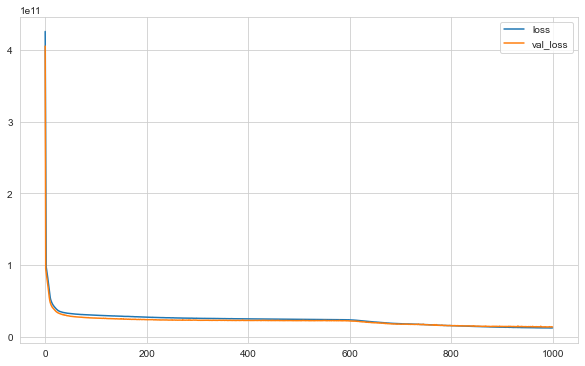

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [118]:
y_pred = model.predict(X_test)

In [119]:
eval_metric(y_test, y_pred)

r2_score: 0.8955719207363172 
mae: 70316.66801938658 
mse: 13416894763.351295 
rmse: 115831.32030392857


In [120]:
model.save('model_kc_house.h5')  # creates a HDF5 file 'my_model.h5'

## Loading Model and Scaler

In [127]:
from tensorflow.keras.models import load_model

In [128]:
model_kc_house = load_model('model_kc_house.h5')
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [129]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,1,0,0


In [130]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00307611, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.15304348, 0.00573322, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [131]:
model_kc_house.predict(single_house)

array([[250665.4]], dtype=float32)

In [132]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression 

In [134]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7165253601273753 
mae: 122268.21481481481 
mse: 36420754246.05278 
rmse: 190842.22343614837


### Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rf_model = RandomForestRegressor(random_state = seed)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8886293030442941 
mae: 64785.36375462963 
mse: 14308880631.643038 
rmse: 119619.73345415479


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___